In [1]:
#Bruno Marra de Melo - 3029
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

pd.options.display.float_format = "{:.2f}".format

In [2]:
#leitura inicial e head para interpretação visual dos dados
df = pd.read_csv('filmes.csv', index_col=False, squeeze=True)

df

,ID,Titulo,Ano,Classificacao_etaria,IMDb,Netflix,Hulu,Amazon_prime,Disney+,Diretores,Generos,Pais,Idioma,Duracao_min
0,1,Inception,2010,13+,8.80,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.00
1,2,The Matrix,1999,18+,8.70,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.00
2,3,Avengers: Infinity War,2018,13+,8.50,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.00
3,4,Back to the Future,1985,7+,8.50,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.00
4,5,"The Good, the Bad and the Ugly",1966,18+,8.80,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.00
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.40,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.00
6,7,The Pianist,2002,18+,8.50,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.00
7,8,Django Unchained,2012,18+,8.40,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.00
8,9,Raiders of the Lost Ark,1981,7+,8.40,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.00
9,10,Inglourious Basterds,2009,18+,8.30,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.00


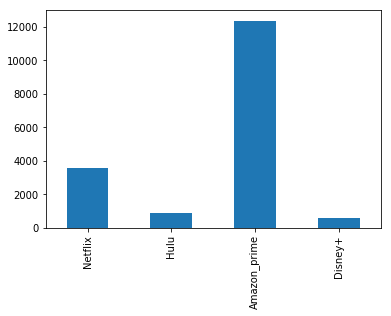

In [3]:
#1. (0,5 ponto) Quantos filmes cada uma das 4 plataformas possui? Faça um gráfico de barras para
#ilustrar esses valores.

#pega o somatório das colunas
somatorio = df.sum(axis=0)

#Seleciona somente colunas de interesse
somatorio = somatorio[['Netflix', 'Hulu', 'Amazon_prime', 'Disney+']]

#plota o gráfico de barras
somatorio.plot(kind="bar")
plt.show()

In [4]:
#2. (0,5 ponto) Quantos filmes estão em mais de uma plataforma?

#A ideia consiste em criar uma nova coluna com o somatório das plataformas
df['Todas as Plataformas'] = df['Netflix'] + df['Hulu'] + df['Amazon_prime'] + df['Disney+']

#e verificar se esse somatório é maior do que 1, se for o filme está em mais de uma plataforma
df[df['Todas as Plataformas'] > 1]['ID'].count()

627

In [5]:
#3. (1 ponto) Qual a plataforma que possui a maior média de nota IMDb?

#Basicamente criar um dataframe para cada uma das plataformas individualmente
netflix = df[df['Netflix'] > 0]
hulu = df[df['Hulu'] > 0]
amazon = df[df['Amazon_prime'] > 0]
disney = df[df['Disney+'] > 0]

#E tirar a média de cada uma delas, verificando qual a maior média de IMDb
print("Netflix: " + str(netflix['IMDb'].mean()))
print("Hulu: " + str(hulu['IMDb'].mean()))
print("Amazon Prime: " + str(amazon['IMDb'].mean()))
print("Disney+: " + str(disney['IMDb'].mean()))
print("Portanto, Disney+")

Netflix: 6.252963393375944
Hulu: 6.1381165919282505
Amazon Prime: 5.770910312395029
Disney+: 6.441385435168739
Portanto, Disney+


In [6]:
#4. (1 ponto) Qual o percentual de filmes de cada plataforma com nota IMDb maior que 8?

#Primeiro criar os dataframes somente com IMDbs maiores que 8 para cada plataforma
netflix8 = netflix[netflix['IMDb'] > 8]
hulu8 = hulu[hulu['IMDb'] > 8]
amazon8 = amazon[amazon['IMDb'] > 8]
disney8 = disney[disney['IMDb'] > 8]

def getPercentual(original, greaterThan8):
    return (greaterThan8['ID'].count() * 100) / original['ID'].count()    

#Depois pegar o percentual, com relação ao total de filmes daquela plataforma
print("Netflix: " + str(getPercentual(netflix, netflix8)))
print("Hulu: " + str(getPercentual(hulu, hulu8)))
print("Amazon: " + str(getPercentual(amazon, amazon8)))
print("Disney: " + str(getPercentual(disney, disney8)))

Netflix: 3.6235955056179776
Hulu: 2.547065337763012
Amazon: 2.6226323457989316
Disney: 3.723404255319149


In [7]:
#5. (1 ponto) Se uma pessoa é uma apreciadora de filmes clássicos antigos, qual plataforma você 
#mais recomenda? Justifique.

#Como a ideia é verificar filmes antigos, selecionamos todos os antigos com ano menor que 1980
netflixOld = netflix[netflix['Ano'] <= 1980]
huluOld = hulu[hulu['Ano'] <= 1980]
amazonOld = amazon[amazon['Ano'] <= 1980]
disneyOld = disney[disney['Ano'] <= 1980]

#Depois basta contar o número de filmes e verificar qual deles possui maior acervo
print("Netflix: " + str(netflixOld['ID'].count()))
print("Hulu: " + str(huluOld['ID'].count()))
print("Amazon: " + str(amazonOld['ID'].count()))
print("Disney: " + str(disneyOld['ID'].count()))
print("Aparentemente para filmes antigos, amazon possui um acervo bem maior")

Netflix: 54
Hulu: 26
Amazon: 2227
Disney: 98
Aparentemente para filmes antigos, amazon possui um acervo bem maior


In [8]:
#6. (1 ponto) Quantas categorias de classificação etária existem? Faça um gráfico de barras com a
#quantidade de filmes por classificação etária.

#A ideia é agrupar todos por classificação etária e contar quantos filmes cada uma tem

classification = df.groupby('Classificacao_etaria')['ID'].count()

len(classification)
#Portanto, o frame é dividido em 5 classificações etárias

5

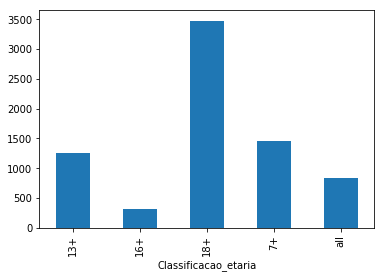

In [9]:
#simplesmente plota o gráfico da questão 6
classification.plot(kind="bar")
plt.show()

In [10]:
#7. (1 pontos) Qual plataforma você mais indicaria para uma criança? Justifique.

netflixChild = netflix[(netflix['Classificacao_etaria'] == 'all') | (netflix['Classificacao_etaria'] == '7+')]
huluChild = hulu[(hulu['Classificacao_etaria'] == 'all') | (hulu['Classificacao_etaria'] == '7+')]
amazonChild = amazon[(amazon['Classificacao_etaria'] == 'all') | (amazon['Classificacao_etaria'] == '7+')]
disneyChild = disney[(disney['Classificacao_etaria'] == 'all') | (disney['Classificacao_etaria'] == '7+')]

print("Netflix: " + str(len(netflixChild['ID'])))
print("Hulu: " + str(len(huluChild['ID'])))
print("Amazon: " + str(len(amazonChild['ID'])))
print("Disney: " + str(len(disneyChild['ID'])))
print("Aparentemente para crianças, amazon possui um acervo bem maior")

Netflix: 453
Hulu: 164
Amazon: 1322
Disney: 456
Aparentemente para crianças, amazon possui um acervo bem maior


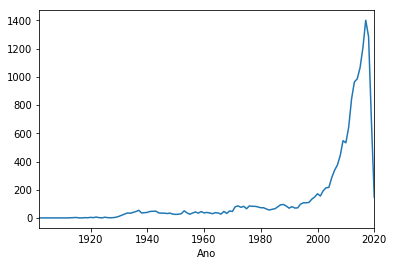

In [11]:
#8. (2 pontos) Faça um gráfico de linhas com a quantidade de filmes disponíveis por ano de
#lançamento. Qual o ano que possui mais filmes, e quantos filmes foram lançados nesse ano? Qual a
#média de lançamentos de filmes por ano? Trace uma linha reta no gráfico com a média, e responda
#em quais anos foram lançados mais filmes do que a média.

#Primeiro vamos agrupar por ano e contar quantos filmes foram feitos em cada ano
moviesPerYear = df.groupby('Ano')['ID'].count()

#plotar o gráfico de linhas
moviesPerYear.plot(kind="line")
plt.show()

In [12]:
#Portanto o ano com maior número de filmes é 2017 com 1401 filmes registrados
moviesPerYear.sort_values().tail(1)

Ano
2017    1401
Name: ID, dtype: int64

In [13]:
#tira a média de filmes por ano.
mean = moviesPerYear.mean()

In [14]:
#Nesses anos foram lançados mais filmes do que a média
moviesPerYear[moviesPerYear > mean]

Ano
2000     172
2001     156
2002     193
2003     214
2004     217
2005     285
2006     338
2007     375
2008     442
2009     548
2010     533
2011     645
2012     843
2013     964
2014     986
2015    1065
2016    1206
2017    1401
2018    1285
2019     689
Name: ID, dtype: int64

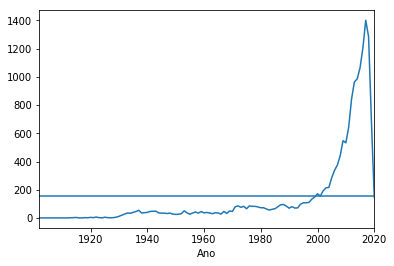

In [15]:
#plotar o gráfico de linhas com a linha da média
moviesPerYear.plot(kind="line")
plt.axhline(y=mean)
plt.show()

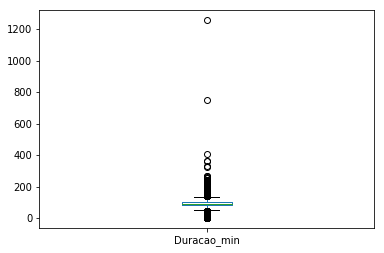

In [16]:
#9. (3 pontos) Faça o Boxplot da duração dos filmes. Em seguida, remova os outliers que achar
#necessário, e faça o histograma da duração. Ajuste o parâmetro "bins" se necessário, para visualizar
#melhor. Em seguida, responda se os valores de duração seguem a distribuição Normal. Justifique.

#Plota o histograma sob todos os dados
df['Duracao_min'].plot.box()
plt.show()

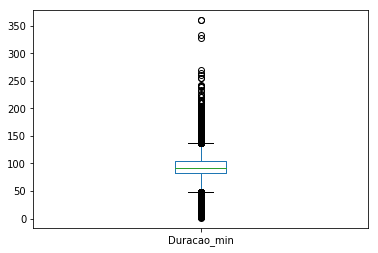

In [17]:
#Como podemos ver, mais de 90% dos dados estão abaixo de 400 e, portanto, vamos remover esses outliers
withoutOutliers = df[df['Duracao_min'] < 400]
withoutOutliers['Duracao_min'].plot.box()
plt.show()

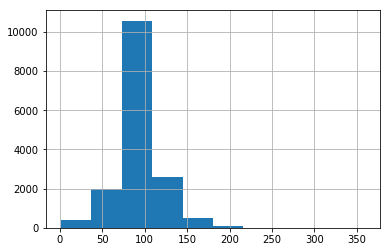

In [18]:
#Como vimos pelo boxplot anterior com menos outliers, podemos plotar agora o histograma
withoutOutliers['Duracao_min'].hist()
plt.show()

#E também como podemos perceber, ele segue sim uma distribuição normal, visto que a maioria dos seus dados estão 2
#colunas acima ou abaixo da maior coluna.

In [19]:
#10. (3 pontos) Quantos gêneros distintos existem? Quantos filmes de cada gênero existem?

#para cada linha do dataframe, percorre e adiciona o gênero único na lista caso ainda não tenha sido adicionado.
def getGeneros(df):
    generos = []
    for genders in df:
        line = str(genders).split(',')
        for gender in line:
            if gender not in generos:
                generos.append(gender)
    return generos

#busca os gêneros e retorna o tamanho da lista.
generos = getGeneros(df['Generos'])
len(generos)

28

In [20]:
#cria um dicionário com a quantidade de filmes de cada gênero
dict_filmes = {}

#para cada gênero encontrado
for genero in generos:
    dict_filmes[genero] = 0
    #soma +1 caso encontre ele na linha do dataframe
    for gender in df['Generos']:
        if str(gender).find(genero) >= 0:
            dict_filmes[genero] += 1
            
dict_filmes

{'Action': 2683,
 'Adventure': 1778,
 'Sci-Fi': 1228,
 'Thriller': 3354,
 'Comedy': 4637,
 'Western': 499,
 'Animation': 711,
 'Family': 1514,
 'Biography': 821,
 'Drama': 7227,
 'Music': 1037,
 'War': 539,
 'Crime': 1833,
 'Fantasy': 1089,
 'Romance': 2359,
 'History': 715,
 'Mystery': 1274,
 'Horror': 2201,
 'Sport': 404,
 'Documentary': 2546,
 'Musical': 401,
 'News': 105,
 'Short': 386,
 'nan': 275,
 'Reality-TV': 22,
 'Talk-Show': 19,
 'Game-Show': 7,
 'Film-Noir': 79}

In [34]:
#11. (3 pontos) Qual o diretor possui a melhor media de nota IMDb dos seus filmes?

#mesma ideia da anterior, percorre e seleciona diretores
def getDiretores(df):
    diretores = []
    for directors in df:
        line = str(directors).split(',')
        for director in line:
            if director not in diretores:
                diretores.append(director)
    return diretores

diretores = getDiretores(df['Diretores'])
len(diretores)

#porém o número de diretores é muito alto! o que faz com que demore bastante para executar

12454

In [36]:
current = 0
currDirector = ""

for director in diretores:
    #tira a média do diretor avaliado
    mean = df[df['Diretores'].str.contains(director, na=False)]['IMDb'].mean()
    
    #se for maior que a do maior encontrado até agora, substitui
    if(mean > current):
        current = mean
        currDirector = director
        
print("O melhor diretor é: " + currDirector + " com " + str(current) + " de média!")

O melhor diretor é: Fen Tian com 9.3 de média!


In [22]:
#12. (3 pontos) Utilize regras de associação para responder às seguintes questões:
#a) Qual o conjunto de itens de gêneros com mais de um gênero que aparece em mais filmes? 

#agrupa por gêneros
df_grouped = df.groupby(['Generos', 'Titulo'])['ID'].count()

#da o unstack nas colunas
movies = df_grouped.unstack(fill_value=0)

#Troca o índice para Generos
movies.reset_index().set_index('Generos')

def encode_units(x):
    if x <= 0:
        return 0
    else:
        return 1

movies = movies.applymap(encode_units)
movies.head()

Titulo,2eleven,Aar Paar,Age Of Kill,All the Devil's Men,Angels from Hell,Arena of the Street Fighter,Armed for Action,Atone,Attack in LA,Best of Shaolin Kung Fu,...,When a Man's a Man,White Comanche,Wide Open Town,Winning of the West,Wrangler's Roost,The Wackiest Wagon Train In The West,Trinity and Sartana Are Coming,Godmonster of Indian Flats,The Range Busters,Texas to Bataan
Generos,,,,,,,,,,,,,,,,,,,,,
Action,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure,Biography",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure,Biography,Drama,History",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure,Biography,Drama,History,Romance,War",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
frequent_itemsets = apriori(movies, min_support=0.8, use_colnames=True)
conffidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.98)
conffidence.sort_values(by='confidence').tail(5)

#porém não entendi pq desse erro, aí não consegui continuar :/

ValueError: cannot call `vectorize` on size 0 inputs unless `otypes` is set